# Лабораторная 7 - Линейная регрессия, Фида А.Д. 6135

### 0.0. Найти и загрузить датасет, подгодящий для регрессии

Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import plotly.express as px

import seaborn as sns

plt.rcParams["figure.figsize"] = (16, 10)
np.random.seed(42)

## Load data

In [2]:
data = pd.read_table('data/car data.csv', header=0, delimiter=',').sample(frac=1.)
data.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
177    Honda Activa 125  2016           0.35           0.57       24000   
289                city  2016          10.11          13.60       10980   
228               verna  2012           4.95           9.40       60000   
198  Bajaj Discover 125  2011           0.15           0.57       35000   
60        corolla altis  2013           6.95          18.61       40001   

    Fuel_Type Seller_Type Transmission  Owner  
177    Petrol  Individual    Automatic      0  
289    Petrol      Dealer       Manual      0  
228    Diesel      Dealer       Manual      0  
198    Petrol  Individual       Manual      1  
60     Petrol      Dealer       Manual      0

In [3]:
data.shape

(301, 9)

In [4]:
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [5]:
data = data.drop('Car_Name', axis=1)

### 0.1. Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [6]:
categ_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
data = data.drop(categ_columns, axis=1)

### 0.5. Визуализировать heatmap-матрицу кореллированности признаков

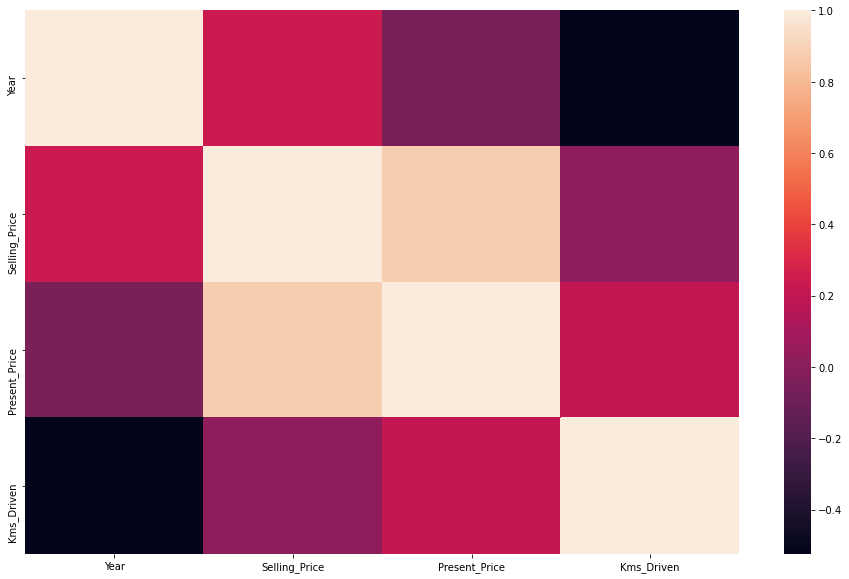

In [7]:
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

### 0.6. Визуализировать взаимосвязь между target-переменной и каждым из признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.

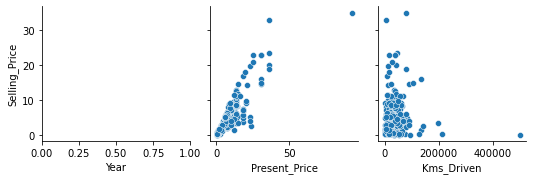

In [8]:
pp = sns.pairplot(data=data,
                  y_vars=['Selling_Price'],
                  x_vars=['Year', 'Present_Price', 'Kms_Driven'])

### 0.8. Разделить на обучающую и тестовую выборки

Подготовка датасета

In [9]:
ids = np.arange(len(data))
np.random.shuffle(ids)

part = len(ids) // 2
train_ids = ids[:part]
val_ids = ids[part:]

In [10]:
X_train, X_valid = data.loc[train_ids].drop('Selling_Price', axis=1), data.loc[val_ids].drop('Selling_Price', axis=1)
y_train, y_valid = data.loc[train_ids]['Selling_Price'], data.loc[val_ids]['Selling_Price']

len(y_train), len(y_valid)

(150, 151)

In [11]:
# X_train, X_valid, y_train, y_valid = train_test_split(data.drop('Selling_Price', axis=1), data['Selling_Price'], test_size=0.5, random_state=42)
# # X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

# len(y_train), len(y_valid)

## 1.: Опробовать линейную регрессию

### 1.1. Обучить модель линейной регрессии (LinearRegression)

In [12]:
lin_reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)

y_pred = lin_reg.predict(X_valid)

### 1.2. Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [13]:
import sklearn.metrics as metrics


def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [14]:
regression_results(y_valid, y_pred)

explained_variance:  0.8355
r2:  0.8352
MAE:  1.318
MSE:  4.5487
RMSE:  2.1328


### 1.3. Вывести model.coef_ и model.intercept_

In [15]:
print(f'coeff: {lin_reg.coef_}\nintercept: {lin_reg.intercept_}')

coeff: [4.52892072e-01 4.68643623e-01 2.81167719e-06]
intercept: -911.0182394403795


### 1.4. Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же как мы строили графики для feature_importance в теме с деревьями) (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси

<BarContainer object of 3 artists>

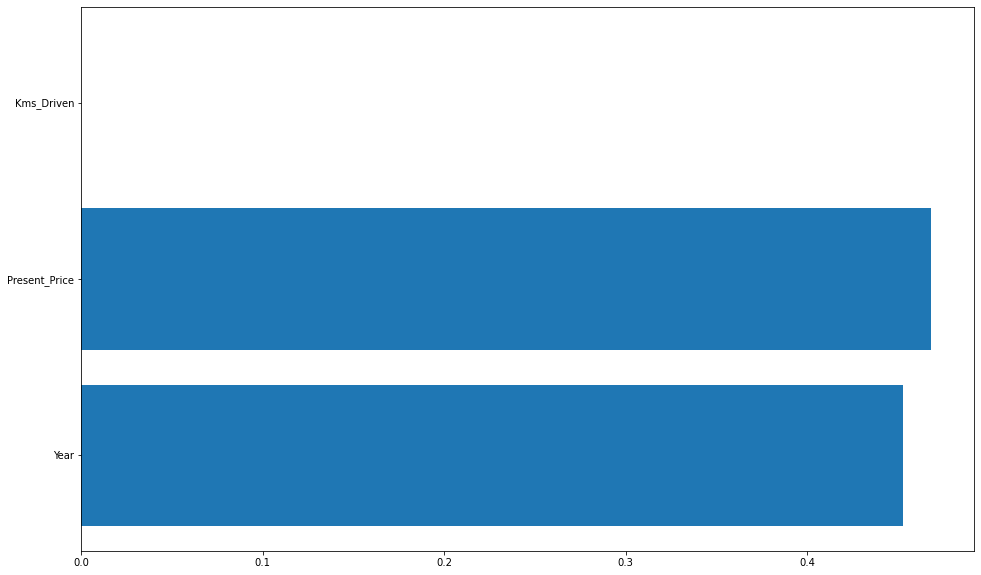

In [16]:
plt.barh(data.drop('Selling_Price', axis=1).columns, lin_reg.coef_)

In [17]:
# %matplotlib
# px.bar(x=data.drop('Selling_Price', axis=1).columns, y=lin_reg.coef_, labels={'x':'Feature', 'y':'Importance'}, title='Feature importance')

## 2.: Опробовать регрессию Lasso

### 2.1. Обучить модель регрессии (Lasso), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [18]:
grid_param = {'alpha':np.arange(0.1, 101, 0.1)}

model = Lasso()
gs = GridSearchCV(model, grid_param, n_jobs=-1).fit(X_train, y_train)

lasso_reg = gs.best_estimator_
y_pred = lasso_reg.predict(X_valid)
gs.best_params_

{'alpha': 0.1}

### 2.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [19]:
regression_results(y_valid, y_pred)

explained_variance:  0.8341
r2:  0.8338
MAE:  1.3207
MSE:  4.5859
RMSE:  2.1415


### 2.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [20]:
print(f'coeff: {lasso_reg.coef_}\nintercept: {lasso_reg.intercept_}')

coeff: [4.38118138e-01 4.67409260e-01 2.33042843e-06]
intercept: -881.2414750751279


### 2.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

<BarContainer object of 3 artists>

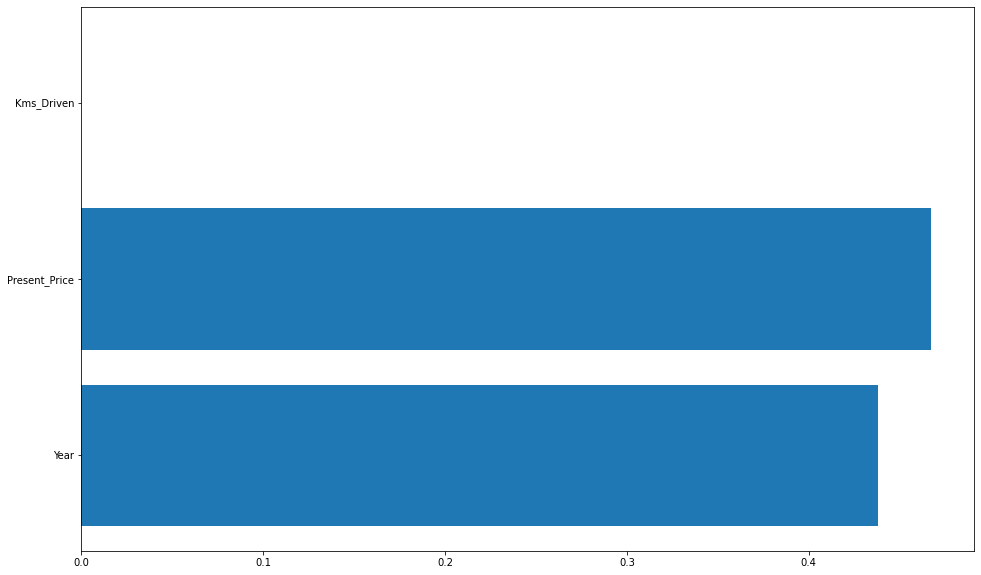

In [21]:
plt.barh(data.drop('Selling_Price', axis=1).columns, lasso_reg.coef_)

## 3.: Опробовать регрессию Ridge

### 3.1. Обучить модель регрессии (Ridge), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [22]:
grid_param = {'alpha':np.arange(0.1, 101, 0.1)}

model = Ridge()
gs = GridSearchCV(model, grid_param, n_jobs=-1).fit(X_train, y_train)

ridge_reg = gs.best_estimator_
y_pred = ridge_reg.predict(X_valid)
gs.best_params_

{'alpha': 0.1}

### 3.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [23]:
regression_results(y_valid, y_pred)

explained_variance:  0.8355
r2:  0.8352
MAE:  1.318
MSE:  4.5488
RMSE:  2.1328


### 3.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [24]:
print(f'coeff: {ridge_reg.coef_}\nintercept: {ridge_reg.intercept_}')

coeff: [4.52847479e-01 4.68639773e-01 2.81022824e-06]
intercept: -910.9283612020105


### 3.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

<BarContainer object of 3 artists>

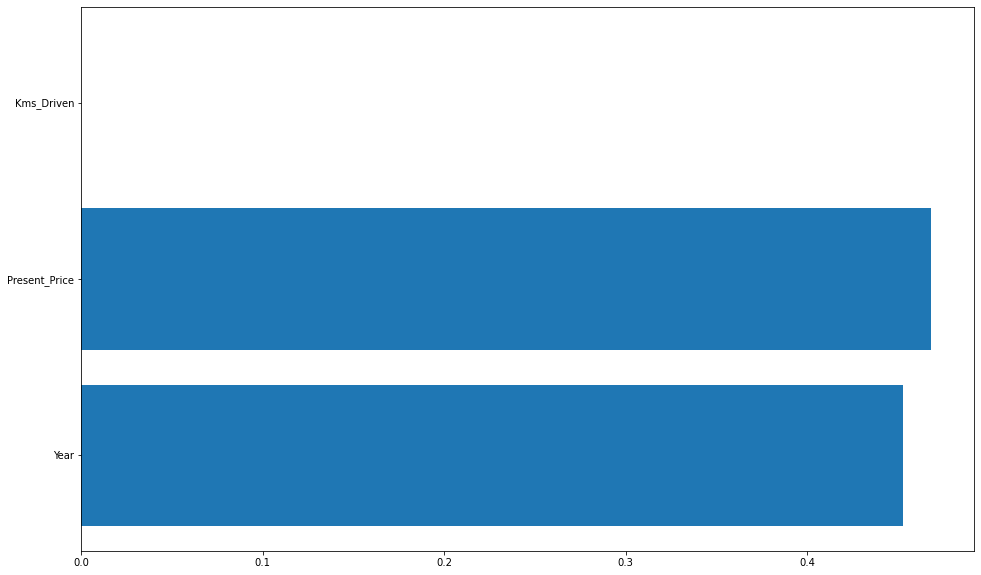

In [25]:
plt.barh(data.drop('Selling_Price', axis=1).columns, ridge_reg.coef_)

## 4.: Опробовать регрессию ElasticNet

### 4.1. Обучить модель регрессии (ElasticNet), с помощью GridSearchCV найти наилучший параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучше моделью

In [26]:
grid_param = {'alpha':np.arange(0.1, 1, 0.1),'l1_ratio':np.arange(0.05,1,0.05)}

model = ElasticNet()
gs = GridSearchCV(model, grid_param, n_jobs=-1).fit(X_train, y_train)

elastic_reg = gs.best_estimator_
y_pred = elastic_reg.predict(X_valid)
gs.best_params_

{'alpha': 0.1, 'l1_ratio': 0.05}

### 4.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [27]:
regression_results(y_valid, y_pred)

explained_variance:  0.8348
r2:  0.8345
MAE:  1.3192
MSE:  4.5664
RMSE:  2.1369


### 4.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [28]:
print(f'coeff: {elastic_reg.coef_}\nintercept: {elastic_reg.intercept_}')

coeff: [4.45878510e-01 4.68035676e-01 2.58385895e-06]
intercept: -896.8823097249059


### 4.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

<BarContainer object of 3 artists>

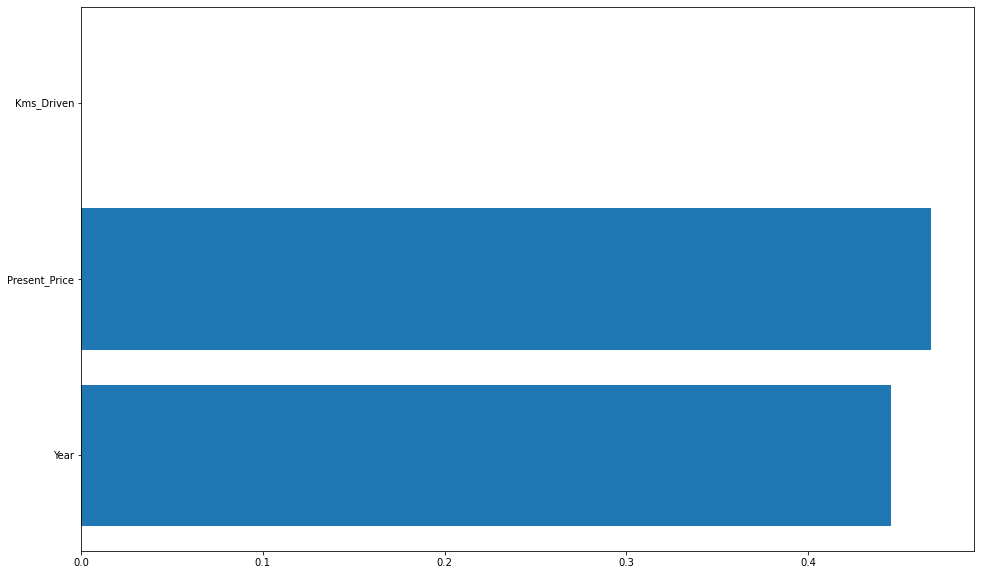

In [29]:
plt.barh(data.drop('Selling_Price', axis=1).columns, elastic_reg.coef_)

## 5.0. Выбрать наилучшую модель, написать её ошибку MAE, MSE и R2 на тестовом наборе

Best model - Ridge

In [30]:
y_pred = ridge_reg.predict(X_valid)
regression_results(y_valid, y_pred)

explained_variance:  0.8355
r2:  0.8352
MAE:  1.318
MSE:  4.5488
RMSE:  2.1328


### 5.1. Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True )

In [74]:
data = pd.read_table('data/car data.csv', header=0, delimiter=',').sample(frac=1.)
data = data.drop('Car_Name', axis=1)
data.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
199  2007           0.12           0.58       53000    Petrol  Individual   
41   2014           2.55           3.98       46706    Petrol      Dealer   
135  2015           0.65           0.74        5000    Petrol  Individual   
148  2010           0.52           0.94       45000    Petrol  Individual   
293  2010           3.25           9.90       38000    Petrol      Dealer   

    Transmission  Owner  
199       Manual      0  
41        Manual      0  
135       Manual      0  
148       Manual      0  
293       Manual      0

In [75]:
data['Owner'] = data['Owner'].map({1: 'owner_type_1', 2: 'owner_type_2', 3: 'owner_type_3'})

In [76]:
fuel_type = pd.get_dummies(data['Fuel_Type'], drop_first=True)
data = data.drop('Fuel_Type', axis=1)
data = data.join(fuel_type)

seller_type = pd.get_dummies(data['Seller_Type'], drop_first=True)
data = data.drop('Seller_Type', axis=1)
data = data.join(seller_type)

transmission = pd.get_dummies(data['Transmission'], drop_first=True)
data = data.drop('Transmission', axis=1)
data = data.join(transmission)

owner = pd.get_dummies(data['Owner'], drop_first=True)
data = data.drop('Owner', axis=1)
data = data.join(owner)

data.head()

Year  Selling_Price  Present_Price  Kms_Driven  Diesel  Petrol  \
199  2007           0.12           0.58       53000       0       1   
41   2014           2.55           3.98       46706       0       1   
135  2015           0.65           0.74        5000       0       1   
148  2010           0.52           0.94       45000       0       1   
293  2010           3.25           9.90       38000       0       1   

     Individual  Manual  owner_type_3  
199           1       1             0  
41            0       1             0  
135           1       1             0  
148           1       1             0  
293           0       1             0

In [77]:
X_train, X_valid = data.loc[train_ids].drop('Selling_Price', axis=1), data.loc[val_ids].drop('Selling_Price', axis=1)
y_train, y_valid = data.loc[train_ids]['Selling_Price'], data.loc[val_ids]['Selling_Price']

len(y_train), len(y_valid)

(150, 151)

In [78]:
grid_param = {'alpha': np.arange(0.1, 50, 0.1)}

model = Ridge()
gs = GridSearchCV(model, grid_param, n_jobs=-1).fit(X_train, y_train)

ridge_reg = gs.best_estimator_
y_pred = ridge_reg.predict(X_valid)
gs.best_params_

{'alpha': 42.900000000000006}

### 5.2. Смотрим насколько изменились метрики MAE и MSE на тестовом наборе, отображаем их

In [79]:
regression_results(y_valid, y_pred)

explained_variance:  0.8523
r2:  0.8516
MAE:  1.1878
MSE:  4.0945
RMSE:  2.0235


Метрики стали лучше

### 5.3. Прогоняем наш датасет (X), который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель новыми данными, пишем получивнуюся ошибку MAE, MSE и R2 на тестовом наборе

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [81]:
grid_param = {'alpha': np.arange(0.1, 50, 0.1)}

model = Ridge()
gs = GridSearchCV(model, grid_param, n_jobs=-1).fit(X_train_scaled, y_train)

ridge_reg = gs.best_estimator_
y_pred = ridge_reg.predict(X_valid_scaled)
gs.best_params_

{'alpha': 14.6}

In [82]:
regression_results(y_valid, y_pred)

explained_variance:  0.8517
r2:  0.8506
MAE:  1.1546
MSE:  4.1223
RMSE:  2.0303


Метрики стали похуже

In [83]:
lasso_reg.coef_

array([ 4.16268016e-01,  4.37530432e-01,  6.12746959e-07,  4.09609143e-01,
       -4.09609143e-01, -5.65945575e-01, -1.50904506e-01,  0.00000000e+00])

### 5.4. Выводим итоговый набор графика с коэффициентами, (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

<BarContainer object of 8 artists>

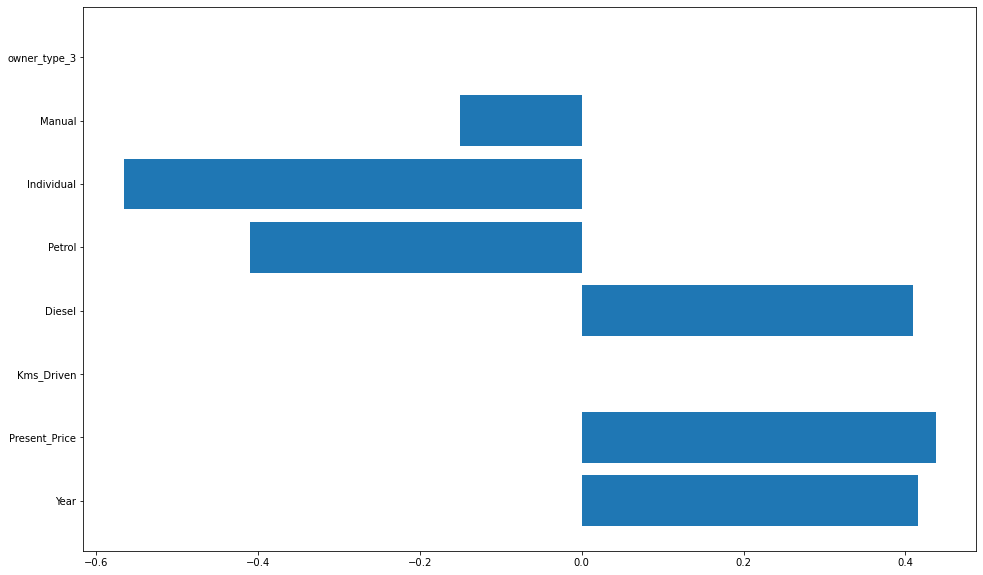

In [84]:
plt.barh(data.drop('Selling_Price', axis=1).columns, lasso_reg.coef_)

# Попробовал скейлить только вещественные признаки, а категориальные оставил как есть

In [85]:
data = pd.read_table('data/car data.csv', header=0, delimiter=',').sample(frac=1.)
data = data.drop('Car_Name', axis=1)
data['Owner'] = data['Owner'].map({1: 'owner_type_1', 2: 'owner_type_2', 3: 'owner_type_3'}) 

fuel_type = pd.get_dummies(data['Fuel_Type'], drop_first=True)
data = data.drop('Fuel_Type', axis=1)

seller_type = pd.get_dummies(data['Seller_Type'], drop_first=True)
data = data.drop('Seller_Type', axis=1)

transmission = pd.get_dummies(data['Transmission'], drop_first=True)
data = data.drop('Transmission', axis=1)

owner = pd.get_dummies(data['Owner'], drop_first=True)
data = data.drop('Owner', axis=1)

categ_data = fuel_type.join(seller_type).join(transmission).join(owner)

data.head()

Year  Selling_Price  Present_Price  Kms_Driven
236  2016           3.10           4.43       11849
70   2014           3.95           6.76       71000
202  2015           4.40           5.70       28200
109  2017           1.20           1.47       11000
108  2016           1.20           1.50       18000

In [86]:
X_train, X_valid = data.loc[train_ids].drop('Selling_Price', axis=1), data.loc[val_ids].drop('Selling_Price', axis=1)
y_train, y_valid = data.loc[train_ids]['Selling_Price'], data.loc[val_ids]['Selling_Price']

X_train_categ, X_valid_categ = categ_data.loc[train_ids], categ_data.loc[val_ids]

len(y_train), len(y_valid)

(150, 151)

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = np.hstack((X_train_scaled, X_train_categ))
X_valid_scaled = np.hstack((X_valid_scaled, X_valid_categ))

In [88]:
grid_param = {'alpha': np.arange(0.1, 50, 0.1)}

model = Ridge()
gs = GridSearchCV(model, grid_param, n_jobs=-1).fit(X_train_scaled, y_train)

ridge_reg = gs.best_estimator_
y_pred = ridge_reg.predict(X_valid_scaled)
gs.best_params_

{'alpha': 14.4}

In [89]:
regression_results(y_valid, y_pred)

explained_variance:  0.8426
r2:  0.8416
MAE:  1.1911
MSE:  4.371
RMSE:  2.0907


Метрики ухудшились

## Выводы

Самое лучшее качество показала модель ридж регрессии на данных без категориальных признаках, она также улучшилась после добавления категориальных признаков, но вот после скейлинга данных, модель стала работать немного хуже